### Декомпозиция

#### 1. Ознакомление с данными
- ##### Откроем файл с данными и изучим общую информацию

#### 2. Выполним предобработку данных
- ##### Посмотрим кол-во пропусков в датасетах
- ##### Проверим явные дубликаты
- ##### Изменим названия столбцов датасетов
- ##### Поменяем тип данных в столбце event_time
- ##### Проверим наличие неявных дубликатов




#### 3. Исследовательский анализ данных
- ##### Найдем сумму уникальных пользователей
- ##### Найдем кол-во уникальных пользователей в разрезе по источнику установки
- ##### Найдем рамки временного диапазона исследования
- ##### Найдем кол-во событий в датасете по типу действий
- ##### Посчитаем, сколько уникальных пользователей совершали каждое из этих событий и их долю
- ##### Выделим кол-во сессий пользователей
- ##### Посмотрим сколько сессий приходиться на пользователя
- ##### Посмотрим на кол-во совершаемых действий внутри сессий
- ##### Найдем среднюю продолжительность сессии
- ##### Посмотрим на сценарии использования приложения
- ##### Построим воронки по выделенным сценариям. Посмотрим на конверсию в целевое действие.
- ##### Посчитаем временную разницу между событиями
- ##### Посмотрим, какие события влияют на конверсию в целевое действие

#### 4. Проверка гипотез
- ##### Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show. Проверим гипотезу: конверсия в просмотры контактов различается у этих двух групп
- ##### Пользователи устанавливают приложения из разных источников. Проверим гипотезу: источник установки приложения влияет на конверсию целевого действия contacts_show

#### 5. Общий вывод
--- 

#### 1. Ознакомление с данными

##### Откроем файл с данными и изучим общую информацию

In [1]:
# Имопртируем библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
import math as mth
import plotly.express as px
import json as json
import seaborn as sns
from datetime import datetime, timedelta
from plotly import graph_objects as go
from matplotlib import pyplot as plt
from scipy import stats as st
from tqdm import tqdm
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
# Зададим переменные датасетов
try:
    mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
    mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')
except:
    mobile_dataset = pd.read_csv('practicum_datasets/mobile_dataset.csv')
    mobile_sourсes = pd.read_csv('practicum_datasets/mobile_sources.csv')

# Зададим настройки отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Выведем первые 5 сток и общую информацию датасета mobile_dataset
display(mobile_dataset.head())
display(mobile_dataset.info())

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

In [4]:
# Выведем первые 5 сток и общую информацию датасета mobile_sourсes
display(mobile_sourсes.head())
display(mobile_sourсes.info())

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

**Вывод:** 
- В датасете mobile_dataset 74 197 строк, тип данных во всех колонках - object
- В датасете mobile_sourсes 4 293 строки, тип данных во всех колонках - object

#### 2. Выполним предобработку данных

##### Посмотрим кол-во пропусков в датасетах

In [5]:
# Выведем сумму пропусков в датасете mobile_dataset
print('Кол-во пропусков в mobile_dataset:')

display(mobile_dataset.isna().sum())

Кол-во пропусков в mobile_dataset:


event.time    0
event.name    0
user.id       0
dtype: int64

In [6]:
# Выведем сумму пропусков в датасете mobile_sourсes
print('Кол-во пропусков в mobile_sourсes:')

display(mobile_sourсes.isna().sum())

Кол-во пропусков в mobile_sourсes:


userId    0
source    0
dtype: int64

Пропусков в датасетах не обнаружено.

##### Проверим явные дубликаты

In [7]:
# Найдем явные дуюликаты в датасете mobile_dataset
print('Ко-во дубликатов:', mobile_dataset.duplicated().sum())

Ко-во дубликатов: 0


In [8]:
# Найдем явные дуюликаты в датасете mobile_sourсes
print('Ко-во дубликатов:', mobile_sourсes.duplicated().sum())

Ко-во дубликатов: 0


Явных дубликатов не обнаружено.

##### Изменим названия столбцов датасетов

In [9]:
# Заменим название столбцов в датасете mobile_dataset
mobile_dataset = mobile_dataset.rename(columns={'event.time': 'event_time', 'event.name': 'event_name', 
                                                'user.id': 'user_id'})
display(mobile_dataset.head())

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [10]:
# Заменим название столбцов в датасете mobile_sourсes
mobile_sourсes.columns = mobile_sourсes.columns.str.lower()
mobile_sourсes = mobile_sourсes.rename(columns={'userid': 'user_id'})

display(mobile_sourсes.head())

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


Названия столбцов приведены к змеиному регистру.

##### Поменяем тип данных в столбце event_time

In [11]:
# Поменяем тип данных в столбце event_time и округлим значения до секунд
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'], 
                                              format='%Y-%m-%d %H:%M:%S').dt.round('1S')


# Создадим отдельный столбец с датой
mobile_dataset['date'] = mobile_dataset['event_time'].dt.date

display(mobile_dataset.head())
display(mobile_dataset.info())

,event_time,event_name,user_id,date
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   date        74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.3+ MB


None

##### Проверим наличие неявных дубликатов

In [12]:
# Проверим наличие неявных дубликатов в датасете mobile_sourсes
display(mobile_sourсes['source'].unique())

array(['other', 'yandex', 'google'], dtype=object)

In [13]:
# Проверим наличие неявных дубликатов в датасете mobile_dataset
display(mobile_dataset['event_name'].sort_values().unique())

array(['advert_open', 'contacts_call', 'contacts_show', 'favorites_add',
       'map', 'photos_show', 'search_1', 'search_2', 'search_3',
       'search_4', 'search_5', 'search_6', 'search_7', 'show_contacts',
       'tips_click', 'tips_show'], dtype=object)

In [14]:
# Заменим название show_contacts в столбце event_name
mobile_dataset['event_name'] = mobile_dataset['event_name'].replace('show_contacts', 'contacts_show', regex = True)

display(mobile_dataset['event_name'].sort_values().unique())

array(['advert_open', 'contacts_call', 'contacts_show', 'favorites_add',
       'map', 'photos_show', 'search_1', 'search_2', 'search_3',
       'search_4', 'search_5', 'search_6', 'search_7', 'tips_click',
       'tips_show'], dtype=object)

В датасете "mobile_dataset" в столбце "event_name" найдены 2 столбца различающиеся записью: 'contacts_show' и 'show_contacts'. Заменили название на единое - 'contacts_show'.

**Выводы предобработки данных:**
- Пропусков в датасетах не обнаружено
- Явных дубликатов не обнаружено
- Заменили название show_contacts в столбце event_name
- Названия столбцов приведены к змеиному регистру
- Поменяли тип данных в столбце event_time

#### 3. Исследовательский анализ данных

##### Найдем сумму уникальных пользователей

In [15]:
# Соединим датасеты и перезапишем в df
df = mobile_dataset.merge(mobile_sourсes)

In [16]:
# Найдем кол-во уникальных пользователей
unique_user = df['user_id'].nunique()
display(unique_user)

4293

В датасете 4 293 уникальных пользователя. Столько же строк в датасете mobile_sourсes.

##### Найдем кол-во уникальных пользователей в разрезе по источнику установки

,source,user_id,percent
0,yandex,1934,45.05
1,other,1230,28.65
2,google,1129,26.30


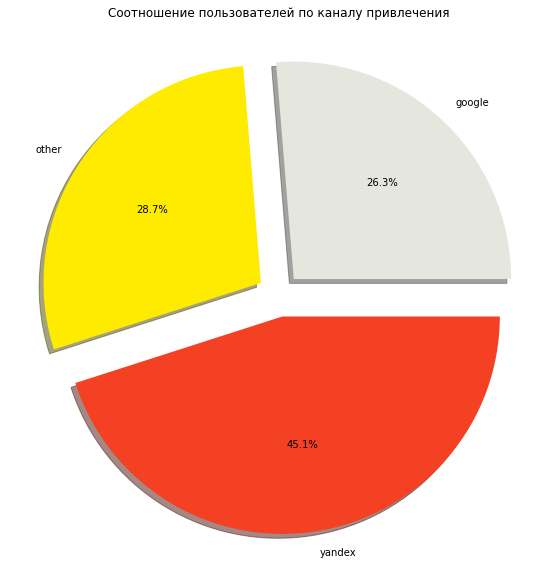

In [17]:
# Найдем кол-во уникальных пользователей
user_by_source = df.groupby('source').agg({'user_id': 'nunique'}).sort_values(by='user_id', 
                                                                              ascending=False).reset_index()

# Создадим столбец, отражающий долю пользователей в процентах
user_by_source['percent'] = round(user_by_source['user_id']/user_by_source['user_id'].sum()*100, 2)
display(user_by_source)

# Построим график
plt.figure(figsize=(10, 10))
colors = ['#f54123', '#ffeb00', '#e5e7de']
explode = (0.1, 0.1, 0.1)
plt.pie(user_by_source['user_id'],
        labels=user_by_source['source'],
        colors=colors,
        explode=explode, 
        autopct='%1.1f%%',
        counterclock=False, 
        shadow=True)

plt.title('Соотношение пользователей по каналу привлечения')
plt.show()

Мы видим, почти половина всех пользователей установило приложение из Яндекса (45,1 %), далее следует источник other (28,7 %), затем google (26,3 %).

##### Найдем рамки временного диапазона исследования

In [18]:
# Найдем минимальную и максимальную дату
print('Минимальная дата исследования:', df['event_time'].min())
print('Максимальная дата исследования:', df['event_time'].max())

Минимальная дата исследования: 2019-10-07 00:00:00
Максимальная дата исследования: 2019-11-03 23:58:13


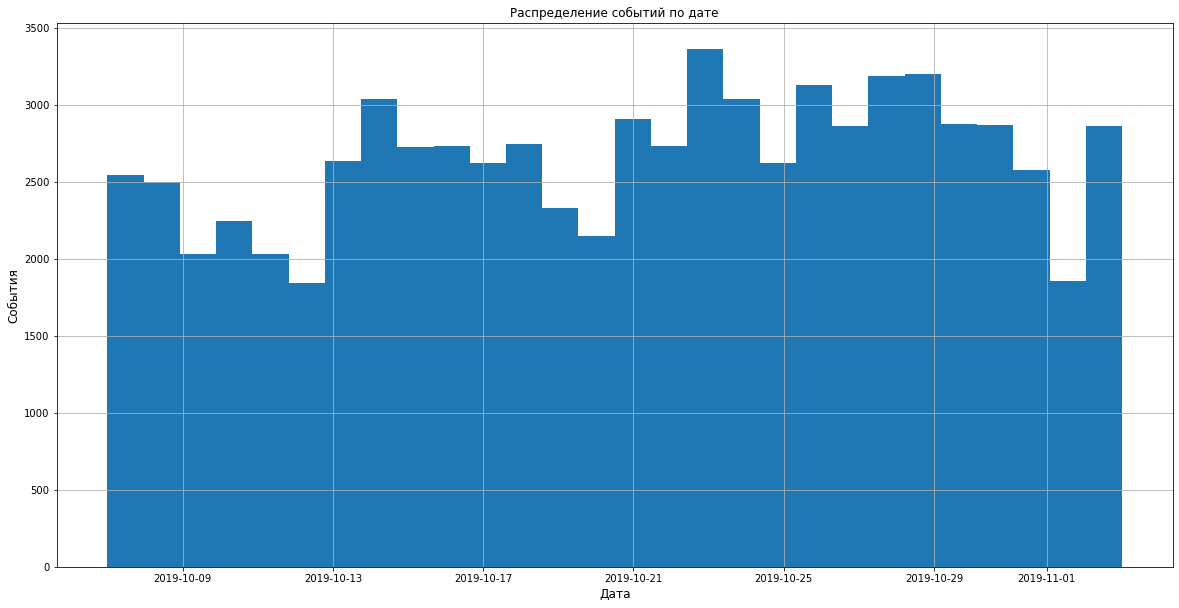

In [19]:
# Построим распределение даты
df['date'].hist(figsize=(20, 10), bins=28)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('События', fontsize=12)
plt.title('Распределение событий по дате')
plt.show()

Посмотрим сколько событий приходиться на определенную дату

In [20]:
# Найдем кол-во событий по дате
event_by_date = df.groupby('date').agg({'event_name': 'count'}).reset_index()
event_by_date.columns = ['date', 'event_count']
event_by_date

,date,event_count
0,2019-10-07,2545
1,2019-10-08,2499
2,2019-10-09,2027
3,2019-10-10,2243
4,2019-10-11,2030
5,2019-10-12,1843
6,2019-10-13,2635
7,2019-10-14,3034
8,2019-10-15,2722
9,2019-10-16,2730


События по дате распределены равномерно, сильных отклонений и аномалий нет. Можно брать в работу весь исследуемый период.

##### Найдем кол-во событий в датасете по типу действий

In [21]:
display(df.head())

,event_time,event_name,user_id,date,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other


Действия "search_n" можно объединить в одну категорию для наглядности, т.к. это действие обозначает поиск по сайту

In [22]:
# Объединяем search
df['event_name'] = df['event_name'].str.replace('search_+\d', 'search', regex=True)

,event_name,event_count
0,tips_show,40055
1,photos_show,10012
2,search,6784
3,advert_open,6164
4,contacts_show,4529
5,map,3881
6,favorites_add,1417
7,tips_click,814
8,contacts_call,541


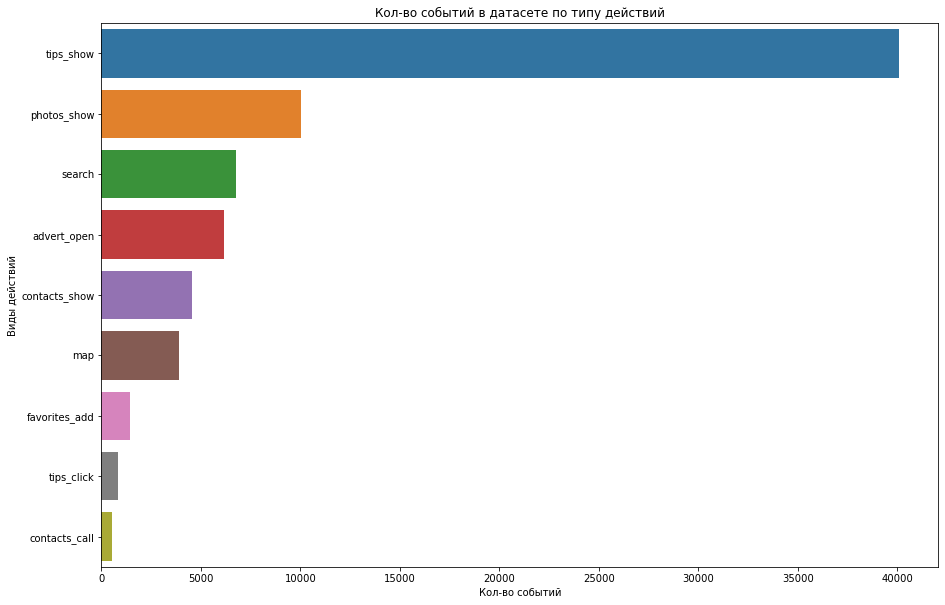

In [23]:
# Сгруппируем кол-во событий по типу события
event_count = df.groupby('event_name').agg({
    'event_time': 'count'}).sort_values(by='event_time', ascending=False).reset_index()
event_count.columns = ['event_name', 'event_count']

display(event_count)

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='event_count', y='event_name', data=event_count)
ax.set_title('Кол-во событий в датасете по типу действий')
ax.set_xlabel('Кол-во событий') 
ax.set_ylabel('Виды действий')
plt.show()

Из графика можно сделать следующие выводы:
- Больше всего показов занимает событие: рекомендованное объявление
- Просмотры фото происходят чаще чем открытие карточки объявления
- Самое нераспространенное действие - звонок по объявлению

Важно отметить, tips_show (показы объявления) - происходят автоматически на всех пользователей в приложении. Данные показы не являются явным целевым действием, поэтому его можно не брать в рассчет в некоторых пунктах исследования.

##### Посчитаем, сколько уникальных пользователей совершали каждое из этих событий и их долю

,event_name,user_count,user_percent
0,tips_show,2801,65.25
1,search,1666,38.81
2,map,1456,33.92
3,photos_show,1095,25.51
4,contacts_show,981,22.85
5,advert_open,751,17.49
6,favorites_add,351,8.18
7,tips_click,322,7.50
8,contacts_call,213,4.96


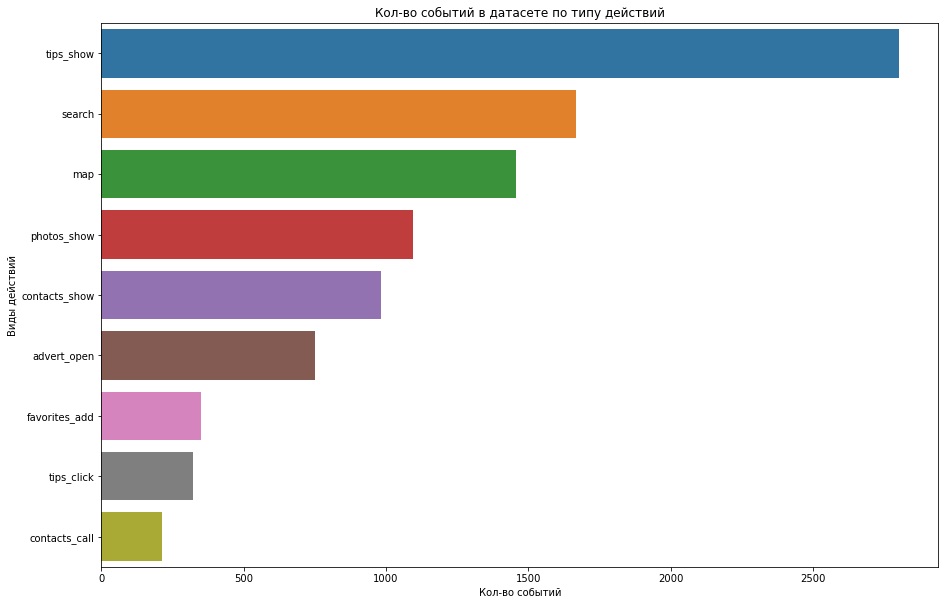

In [24]:
# Группируем кол-во униальных пользователей по событию
event_user = df.groupby('event_name').agg({
    'user_id': 'nunique'}).sort_values(by='user_id', ascending=False).reset_index()
event_user.columns = ['event_name', 'user_count']
event_user['user_percent'] = round((event_user['user_count'].apply(lambda x: x/unique_user) * 100), 2)

display(event_user)


plt.figure(figsize=(15, 10))
ax = sns.barplot(x='user_count', y='event_name', data=event_user)
ax.set_title('Кол-во событий в датасете по типу действий')
ax.set_xlabel('Кол-во событий') 
ax.set_ylabel('Виды действий')
plt.show()

- tips_show является лидером. Показы рекомендаций работают хорошо.
- 2 и 3 место занимают поиск и карта объявлений. Можно сделать вывод, что большинство пользователей не уходит дальше первых двух шагов.
- contacts_show совершают 22,85% пользователей. Важно отметить, что данное событие совершает больший процент людей, чем событие advert_open. Скорее всего пользователи смотрят контакты, не проваливаясь в объявление.

##### Выделим кол-во сессий пользователей

Пользователи активно используют приложение, просматривая фото, объявления и другую информацию. Единственные времязатратные шаги - это просмотр карты событий и просмотр фото. 

30 минут более чем достаточно для совершения одного из целевых действий (просмотра фотографий или открытия карточки), поэтому за максимальнодопустимую границу возьмем - 30 мин на шаг. Если активности нету свыше 30 мин, то сессию будем считать закрытой. Во многих мобильных приложениях таймаут сессии равен данному временному интервалу.

In [25]:
# Выделяем сессии
session = (df.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()
df['session_id'] = df.groupby(['user_id', session], sort=False).ngroup() + 1
display(df.head())

,event_time,event_name,user_id,date,source,session_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other,1
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other,1
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other,1
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other,1
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other,1


In [26]:
# Посмотрим на кол-во сессий
display(df['session_id'].nunique())

10368

Всего в датасете получилось 10 368 сессий.

##### Посмотрим сколько сессий приходиться на пользователя

In [27]:
# Создадим датафрейм
user_sessions = df.groupby('user_id').agg({'session_id': 'nunique'}).reset_index()
user_sessions.columns = ['user_id', 'session_count']
display(user_sessions.head())

,user_id,session_count
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4
1,00157779-810c-4498-9e05-a1e9e3cedf93,6
2,00463033-5717-4bf1-91b4-09183923b9df,1
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,6
4,00551e79-152e-4441-9cf7-565d7eb04090,3


In [28]:
# Посмотрим на 90, 95, 99 персентиль
display(np.percentile(user_sessions['session_count'], [90, 94, 95, 99]))
display(user_sessions.describe())

array([ 4.,  6.,  7., 17.])

,session_count
count,4293.000000
mean,2.415094
std,3.536466
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,99.000000


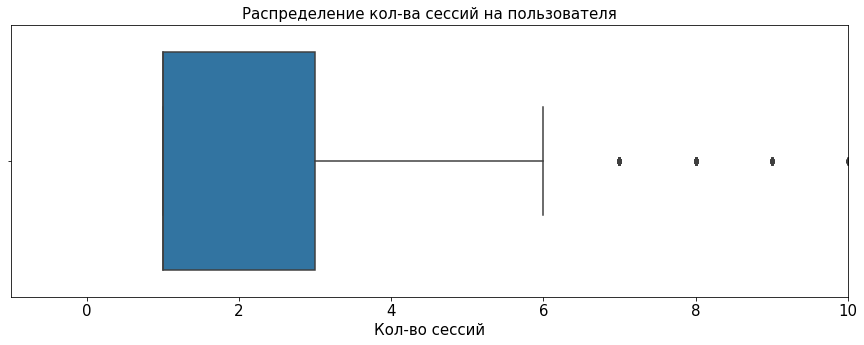

In [29]:
# Построим распределение
plt.figure(figsize=(15,5))
sns.boxplot(data=user_sessions, x='session_count')
plt.title('Распределение кол-ва сессий на пользователя', fontsize = 15)
plt.xlabel('Кол-во сессий', fontsize = 15)
plt.xticks(fontsize=15)
plt.xlim(-1, 10)
plt.show()

99% пользователей имеют не более 17 сессий, а 94% - не больше 6 сессий. Половина пользователей использовала приложение только 1 раз за исследуемый период. 
Более 6 сессий можно считать выбросами, исходя из графика распределения.

##### Посмотрим на кол-во совершаемых действий внутри сессий

In [30]:
# Создадим датафрейм
session_event = df.groupby('session_id').agg({'event_time': 'nunique'}).reset_index()
session_event.columns = ['session_id', 'count_event']

display(session_event.head())

,session_id,count_event
0,1,28
1,2,25
2,3,8
3,4,16
4,5,20


In [31]:
# Посмотрим на 90, 95, 99 персентиль
display(np.percentile(session_event['count_event'], [90, 95, 99]))
display(session_event['count_event'].describe())

array([16.  , 24.  , 45.33])

count    10368.000000
mean         7.035108
std          9.398076
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        149.000000
Name: count_event, dtype: float64

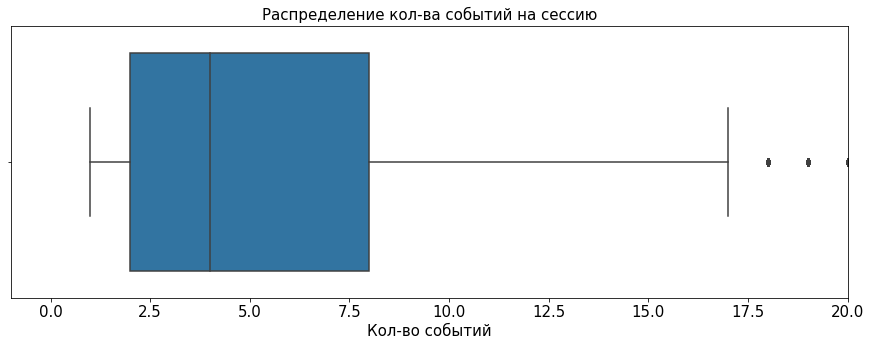

In [32]:
# Построим распределение
plt.figure(figsize=(15,5))
sns.boxplot(data=session_event, x='count_event')
plt.title('Распределение кол-ва событий на сессию', fontsize = 15)
plt.xlabel('Кол-во событий', fontsize = 15)
plt.xticks(fontsize=15)
plt.xlim(-1, 20)
plt.show()

В среднем, пользователи совершают от 2 до 8 действий в сессии. Более 16 действий можно считать выбросами по 90 персентилю. 

##### Найдем среднюю продолжительность сессии

In [33]:
# Сгруппируем информацию о продолжительности сессий
df_time = df.groupby('session_id').agg({'event_time': ['min', 'max']}).reset_index()
df_time.columns = ['session_id', 'min_date', 'max_date']
df_time['session_duration'] = df_time['max_date'] - df_time['min_date']

display(df_time.describe())

,session_id,session_duration
count,10368.00000,10368
mean,5184.50000,0 days 00:12:52.668981481
std,2993.12813,0 days 00:19:51.607952024
min,1.00000,0 days 00:00:00
25%,2592.75000,0 days 00:00:21
50%,5184.50000,0 days 00:05:35
75%,7776.25000,0 days 00:17:25.250000
max,10368.00000,0 days 05:21:58


Средняя продолжительность сессии составляет от 21 секунды до 17 минут. Середина - 5,5 минуты. Возможна ситуация, когда приложение вылетает и минимальные значения составляют 0 минут. Так же возможен вариант открытия приложения по ошибке, что тоже может сдвинуть временной диапазон.

In [34]:
# Сгруппируем информацию о продолжительности шага
df_step = df.groupby('session_id').agg(diff_time=('event_time', 'diff')).reset_index()
df_step.columns = ['session_step', 'time']

display(df_step.describe())

,session_step,time
count,74197.000000,63829
mean,37098.000000,0 days 00:02:05.507715928
std,21418.973299,0 days 00:03:28.693288715
min,0.000000,0 days 00:00:00
25%,18549.000000,0 days 00:00:20
50%,37098.000000,0 days 00:01:01
75%,55647.000000,0 days 00:02:16
max,74196.000000,0 days 00:30:00


Средняя продолжительность шага внутри сессии составляет от 20 секунд до 2.16 минут. 

**Промежуточные выводы:**
- Самое распространенное событие - tips_show, затем идет search и map
- В датасете 10368 уникальных сессий
 - временной диапазон продолжительности сесии составляет от 21 секунды до 17 минут 26 секунд (от 25 дл 75 % пользователей)
 - временной диапазон действия пользователя составляет от 20 секунд до 2 минут 16 секунд (от 25 дл 75 % пользователей)
- В среднем, пользователи совершают от 2 до 8 действий в сессии (от 25 дл 75 % пользователей)
- В среднем на пользователя приходится от 1 до 3 сессий (от 25 дл 75 % пользователей)

##### Посмотрим на сценарии использования приложения

Построим диаграмму Сэнкея и посмотрим на сценарии использования приложения

In [35]:
# Уберем повторяющиеся события внутри сессии
session_df = df.drop_duplicates(['session_id', 'event_name'])

# Создадим датафрейм table для диаграммы
table = session_df[['session_id', 'event_time', 'event_name']]
table = table.rename(columns = {'session_id':'user_id'})
display(table.head())

,user_id,event_time,event_name
0,1,2019-10-07 00:00:00,advert_open
1,1,2019-10-07 00:00:01,tips_show
10,1,2019-10-07 00:04:12,map
28,2,2019-10-07 00:00:02,tips_show
29,2,2019-10-07 00:00:56,advert_open


In [36]:
# Определим пары source-target

def add_features(df):

    
    # сортируем по id и времени
    sorted_df = df.sort_values(by=['user_id', 'event_time']).copy()
    # добавляем шаги событий
    sorted_df['step'] = sorted_df.groupby('user_id').cumcount() + 1
    
    # добавляем узлы-источники и целевые узлы
    # узлы-источники - это сами события
    sorted_df['source'] = sorted_df['event_name']
    # добавляем целевые узлы
    sorted_df['target'] = sorted_df.groupby('user_id')['source'].shift(-1)
    
    # возврат таблицы без имени событий
    return sorted_df.drop(['event_name'], axis=1)
  
# преобразуем таблицу
table = add_features(table)
table.head()

,user_id,event_time,step,source,target
0,1,2019-10-07 00:00:00,1,advert_open,tips_show
1,1,2019-10-07 00:00:01,2,tips_show,map
10,1,2019-10-07 00:04:12,3,map,NaN
28,2,2019-10-07 00:00:02,1,tips_show,advert_open
29,2,2019-10-07 00:00:56,2,advert_open,tips_click


In [37]:
# Удалим пропуски в target
table = table.dropna()

Выберем количество шагов на нашей будущей диаграмме. Границей будет служить 75% пользователей, которые совершают не более 8 действий внутри сессии. Сохраним результат в новую переменную.

In [38]:
df_comp = table[table['step'] <= 8].copy().reset_index(drop=True)

In [39]:
# Создание индексов 

def get_source_index(data):
    
    res_dict = {}
    
    count = 0
    # получаем индексы источников
    for no, step in enumerate(data['step'].unique().tolist()):
        # получаем уникальные наименования для шага
        res_dict[no+1] = {}
        res_dict[no+1]['sources'] = data[data['step'] == step]['source'].unique().tolist()
        res_dict[no+1]['sources_index'] = []
        for i in range(len(res_dict[no+1]['sources'])):
            res_dict[no+1]['sources_index'].append(count)
            count += 1
            
    # соединим списки
    for key in res_dict:
        res_dict[key]['sources_dict'] = {}
        for name, no in zip(res_dict[key]['sources'], res_dict[key]['sources_index']):
            res_dict[key]['sources_dict'][name] = no
    return res_dict
  
# создаем словарь
source_indexes = get_source_index(df_comp)

In [40]:
# Сгенерируем цвета для sources

def generate_random_color():
    
    # сгенерим значение для каждого канала
    r, g, b = np.random.randint(255, size=3)
    return f'rgba({r}, {g}, {b}, 1)'

def colors_for_sources(mode):
    
    # словарь, в который сложим цвета в соответствии с индексом
    colors_dict = {}
    
    if mode == 'random':
        # генерим случайные цвета
        for label in df_comp['source'].unique():
            r, g, b = np.random.randint(255, size=3)            
            colors_dict[label] = f'rgba({r}, {g}, {b}, 1)'
 
    
    return colors_dict

colors_dict = colors_for_sources(mode='random')

Создаем словарь с данными:
- sources - список с индексами sources;
- targets - список с индексами target;
- values - количество уникальных пользователей, совершивших переход между узлами source-target ("объем" потока между узлами);
- labels - названия узлов;
- colors_labels - цвет узлов;
- link_color - цвет потоков между узлами;
- link_text - дополнительная информация.



In [41]:
# Рассчитываем количество уникальных пользователей в процентах

def percent_users(sources, targets, values):
    
    # объединим источники и метки и найдем пары
    zip_lists = list(zip(sources, targets, values))
    
    new_list = []
    
    # подготовим список словарь с общим объемом трафика в узлах
    unique_dict = {}
    
    # проходим по каждому узлу
    for source, target, value in zip_lists:
        if source not in unique_dict:
            # находим все источники и считаем общий трафик
            unique_dict[source] = 0
            for sr, tg, vl in zip_lists:
                if sr == source:
                    unique_dict[source] += vl
                    
    # считаем проценты
    for source, target, value in zip_lists:
        new_list.append(round(100 * value / unique_dict[source], 1))
    
    return new_list

In [42]:
# Создаем словарь с данными для отрисовки диаграммы

def lists_for_plot(source_indexes=source_indexes, colors=colors_dict, frac=10):
    
    sources = []
    targets = []
    values = []
    labels = []
    link_color = []
    link_text = []

    # проходим по каждому шагу
    for step in tqdm(sorted(df_comp['step'].unique()), desc='Шаг'):
        if step + 1 not in source_indexes:
            continue

        # получаем индекс источника
        temp_dict_source = source_indexes[step]['sources_dict']

        # получаем индексы цели
        temp_dict_target = source_indexes[step+1]['sources_dict']

        # проходим по каждой возможной паре, считаем количество таких пар
        for source, index_source in tqdm(temp_dict_source.items()):
            for target, index_target in temp_dict_target.items():
                # делаем срез данных и считаем количество id            
                temp_df = df_comp[(df_comp['step'] == step)&(df_comp['source'] == source)&(df_comp['target'] == target)]
                value = len(temp_df)
                # проверяем минимальный объем потока и добавляем нужные данные
                if value > frac:
                    sources.append(index_source)
                    targets.append(index_target)
                    values.append(value)
                    # делаем поток прозрачным для лучшего отображения
                    link_color.append(colors[source].replace(', 1)', ', 0.2)'))
                    
    labels = []
    colors_labels = []
    for key in source_indexes:
        for name in source_indexes[key]['sources']:
            labels.append(name)
            colors_labels.append(colors[name])
            
    # посчитаем проценты всех потоков
    perc_values = percent_users(sources, targets, values)
    
    # добавим значения процентов для howertext
    link_text = []
    for perc in perc_values:
        link_text.append(f"{perc}%")
    
    # возвратим словарь с вложенными списками
    return {'sources': sources, 
            'targets': targets, 
            'values': values, 
            'labels': labels, 
            'colors_labels': colors_labels, 
            'link_color': link_color, 
            'link_text': link_text}
  

# создаем словарь
data_for_plot = lists_for_plot()

100%|█████████████████████████████████████████████| 8/8 [00:00<00:00, 88.05it/s]

100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 93.65it/s]

Шаг: 100%|████████████████████████████████████████| 5/5 [00:00<00:00, 14.81it/s]


In [43]:
# Создаем объект диаграммы

def plot_senkey_diagram(data_dict=data_for_plot):    
    
    fig = go.Figure(data=[go.Sankey(
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 50,
          thickness = 15,
          line = dict(color = "black", width = 0.1),
          label = data_dict['labels'],
          color = data_dict['colors_labels']
        ),
        link = dict(
          source = data_dict['sources'],
          target = data_dict['targets'],
          value = data_dict['values'],
          label = data_dict['link_text'],
          color = data_dict['link_color']
      ))])
    fig.update_layout(title_text="Сценарии использования приложения", font_size=10, width=1000, height=800)
    
    # возвращаем объект диаграммы
    return fig
  

# сохраняем диаграмму в переменную
senkey_diagram = plot_senkey_diagram()

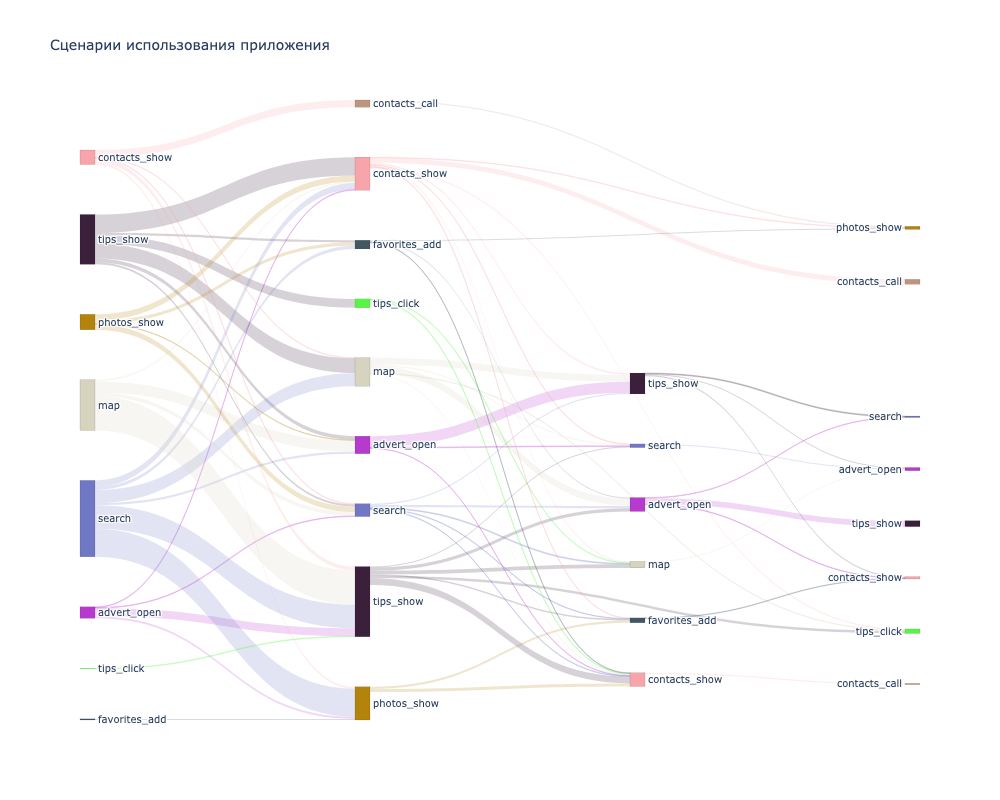

In [44]:
# Выводим график

senkey_diagram.show()

На графике представлены основные сценарии использования приложения. Важно учесть, на смартфонах приложение не закрывается полностью, а сворачивается, поэтому пользователи, с началом новой сессии, могут начать пользоваться приложением с последнего момента, на котором они остановились. 

Выделим основные сценарии использования приложения.

Стандартное использование приложения начинается с открытия карты. Выберем данное действие как отправную точку. Обязательное условие - наличие действия открытия карточки, т.к. информация о контактах обычно храниться внутри карточки. Посмотрим, какие сценария использования, приводящие к целевому действию contacts_show, возможны:

- map - search - advert_open - contacts_show (1 ый сценарий)
- map - advert_open - contacts_show (2 ой сценарий)
- map - tips_show - advert_open - contacts_show (3 ий сценарий)

##### Построим воронки по выделенным сценариям. Посмотрим на конверсию в целевое действие.

In [45]:
# Создадим датасет для воронок
data = df

In [46]:
# Создаем столбцы со следующим шагом внутри сессии
data['step_1'] = data['event_name'].shift(-1)
data['step_2'] = data['step_1'].shift(-1)
data['step_3'] = data['step_2'].shift(-1)

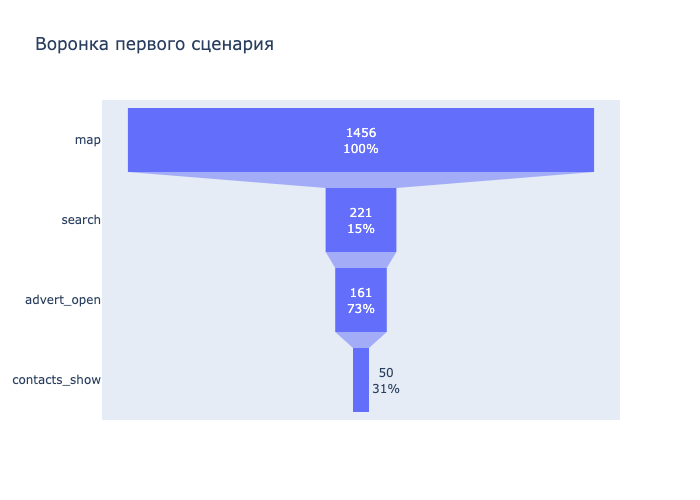

In [47]:
# Строим воронку для первогго сценария
fig = go.Figure()
fig = go.Figure(go.Funnel(
    y = ['map', 'search', 'advert_open', 'contacts_show'],
    x = [data.query('event_name=="map"')['user_id'].nunique(), \
         data.query('event_name=="map" and step_1=="search"')['user_id'].nunique(), \
         data.query('step_1=="search" and step_2=="advert_open"')['user_id'].nunique(), \
         data.query('step_2=="advert_open" and step_3=="contacts_show"')['user_id'].nunique()], \
    textinfo = "value+percent previous"))
fig.update_layout(title="Воронка первого сценария")
fig.show()

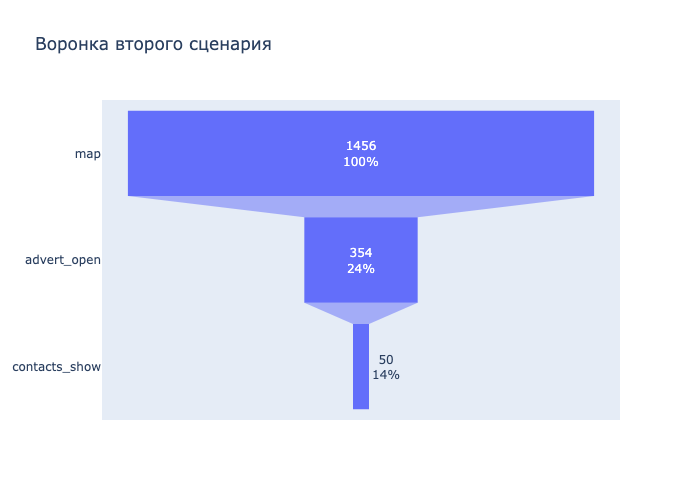

In [48]:
# Строим воронку для второго сценария
fig = go.Figure()
fig = go.Figure(go.Funnel(
    y = ['map', 'advert_open', 'contacts_show'],
    x = [data.query('event_name=="map"')['user_id'].nunique(), \
         data.query('event_name=="map" and step_1=="advert_open"')['user_id'].nunique(), \
         data.query('step_1=="advert_open" and step_2=="contacts_show"')['user_id'].nunique()], \
    textinfo = "value+percent previous"))
fig.update_layout(title="Воронка второго сценария")
fig.show()

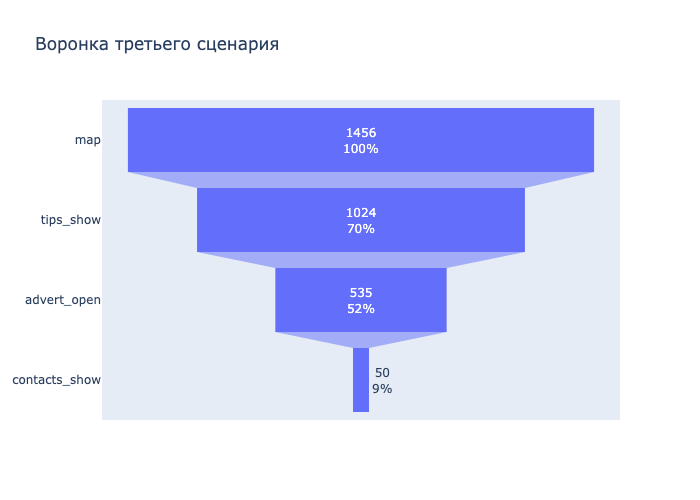

In [49]:
# Строим воронку для третьего сценария
fig = go.Figure()
fig = go.Figure(go.Funnel(
    y = ['map', 'tips_show', 'advert_open', 'contacts_show'],
    x = [data.query('event_name=="map"')['user_id'].nunique(), \
         data.query('event_name=="map" and step_1=="tips_show"')['user_id'].nunique(), \
         data.query('step_1=="tips_show" and step_2=="advert_open"')['user_id'].nunique(), \
         df.query('step_2=="advert_open" and step_3=="contacts_show"')['user_id'].nunique()], \
    textinfo = "value+percent previous"))
fig.update_layout(title="Воронка третьего сценария")
fig.show()


- 1 сценарий:
 - конверсия в целевое действие 2,6 % от общего
 - предшествующие события - map - search - advert_open
- 2 сценарий: 
 - конверсия в целевое действие 2,7 % от общего
 - предшествующие события - map - advert_open
- 3 сценарий: 
 - конверсия в целевое действие 1,6 % от общего
 - предшествующие события - map - tips_show - advert_open 
 
В целом не самые сильные показатели конверсии. Скорее всего они обусловлены тем, что в карточке объявления находиться дополнительная информация, которую просматривают пользователи. Пользователи выбирают товар, поэтому, даже если он им понравился, они могут выбирать дальше из имеющихся предложений.
Можно отметить хорошие показатели конверсии на 3 графике. Рекомендованные объявления хорошо себя показали на карте объявлений. Так же можно выделить слабую конверсию с карты в поиск. Можно предположить, что пользователи выбирают из предлагаемых карточек товара.

##### Посчитаем временную разницу между событиями



У нас есть 3 основных сценария использования:
- map - search - advert_open - contacts_show (1 ый сценарий)
- map - advert_open - contacts_show (2 ой сценарий)
- map - tips_show - advert_open - contacts_show (3 ий сценарий)

Выделим несколько пар просмотра событий:
- map - tips_show
- map - advert_open
- map - search
- search - advert_open
- tips_show - advert_open
- advert_open - contacts_show

In [50]:
# Создадим списки для сессий
id_map = df.query('event_name == "map"')['session_id'].unique().tolist()
id_tips_show = df.query('event_name == "tips_show"')['session_id'].unique().tolist()
id_search = df.query('event_name == "search"')['session_id'].unique().tolist()
id_advert_open = df.query('event_name == "advert_open"')['session_id'].unique().tolist()
id_contacts_show = df.query('event_name == "contacts_show"')['session_id'].unique().tolist()

In [51]:
# Создадим датафрейм с подходящими сессиями 
time_df = df.query('session_id in @id_map and session_id in @id_tips_show and session_id in @id_advert_open \
and session_id in @id_contacts_show and session_id in @id_search')

# Построим датафрейм для map - tips_show
map_tips_show = time_df.query('event_name == "map" or event_name == "tips_show"').drop_duplicates(
    ['event_name', 'user_id']).sort_values(by=['session_id', 'event_time'])

# Посмотрим на распределение времени
map_tips_show.groupby('session_id').agg(diff_time=('event_time', 'diff')).reset_index().describe()

,index,diff_time
count,54.000000,27
mean,37478.907407,0 days 00:08:32.629629629
std,20093.059390,0 days 00:14:01.381242963
min,9523.000000,0 days 00:00:24
25%,20415.750000,0 days 00:01:31.500000
50%,38128.500000,0 days 00:02:36
75%,53552.250000,0 days 00:08:00.500000
max,73115.000000,0 days 01:02:00


In [52]:
# Построим датафрейм для map - advert_open
map_tips_show = time_df.query('event_name == "map" or event_name == "advert_open"').drop_duplicates(
    ['event_name', 'user_id']).sort_values(by=['session_id', 'event_time'])

# Посмотрим на распределение времени
map_tips_show.groupby('session_id').agg(diff_time=('event_time', 'diff')).reset_index().describe()

,index,diff_time
count,54.000000,27
mean,37479.814815,0 days 00:08:13.222222222
std,20091.964763,0 days 00:14:32.643699135
min,9527.000000,0 days 00:00:18
25%,20416.250000,0 days 00:00:45.500000
50%,38129.500000,0 days 00:02:10
75%,53552.000000,0 days 00:05:40
max,73111.000000,0 days 01:02:17


In [53]:
# Построим датафрейм для map - search
map_tips_show = time_df.query('event_name == "map" or event_name == "search"').drop_duplicates(
    ['event_name', 'user_id']).sort_values(by=['session_id', 'event_time'])

# Посмотрим на распределение времени
map_tips_show.groupby('session_id').agg(diff_time=('event_time', 'diff')).reset_index().describe()

,index,diff_time
count,54.000000,27
mean,37480.629630,0 days 00:06:16
std,20093.516452,0 days 00:13:33.758800023
min,9527.000000,0 days 00:00:02
25%,20417.250000,0 days 00:00:10
50%,38127.000000,0 days 00:00:37
75%,53552.000000,0 days 00:02:32
max,73112.000000,0 days 00:55:47


In [54]:
# Построим датафрейм для search - advert_open
map_tips_show = time_df.query('event_name == "search" or event_name == "advert_open"').drop_duplicates(
    ['event_name', 'user_id']).sort_values(by=['session_id', 'event_time'])

# Посмотрим на распределение времени
map_tips_show.groupby('session_id').agg(diff_time=('event_time', 'diff')).reset_index().describe()

,index,diff_time
count,54.000000,27
mean,37479.962963,0 days 00:10:33
std,20093.257720,0 days 00:22:56.020991566
min,9528.000000,0 days 00:00:27
25%,20393.750000,0 days 00:00:51.500000
50%,38127.500000,0 days 00:03:27
75%,53552.500000,0 days 00:09:06
max,73112.000000,0 days 01:58:04


In [55]:
# Построим датафрейм для tips_show - advert_open
map_tips_show = time_df.query('event_name == "tips_show" or event_name == "advert_open"').drop_duplicates(
    ['event_name', 'user_id']).sort_values(by=['session_id', 'event_time'])

# Посмотрим на распределение времени
map_tips_show.groupby('session_id').agg(diff_time=('event_time', 'diff')).reset_index().describe()

,index,diff_time
count,54.000000,27
mean,37478.240741,0 days 00:05:49.407407407
std,20092.800594,0 days 00:08:54.704681918
min,9523.000000,0 days 00:00:05
25%,20394.750000,0 days 00:00:14.500000
50%,38129.000000,0 days 00:02:16
75%,53555.250000,0 days 00:06:51.500000
max,73115.000000,0 days 00:33:12


In [56]:
# Построим датафрейм для advert_open - contacts_show
map_tips_show = time_df.query('event_name == "advert_open" or event_name == "contacts_show"').drop_duplicates(
    ['event_name', 'user_id']).sort_values(by=['session_id', 'event_time'])

# Посмотрим на распределение времени
map_tips_show.groupby('session_id').agg(diff_time=('event_time', 'diff')).reset_index().describe()

,index,diff_time
count,54.000000,27
mean,37483.666667,0 days 00:12:38.037037037
std,20090.629775,0 days 00:16:04.935290037
min,9530.000000,0 days 00:00:21
25%,20438.000000,0 days 00:01:50
50%,38147.500000,0 days 00:05:32
75%,53557.500000,0 days 00:18:49.500000
max,73137.000000,0 days 01:10:51


Медианное время по парам составило:
- map - tips_show (2:35 секунд)
- map - advert_open (2:11 секунд)
- map - search (0:37 секунд)
- search - advert_open (3:27 секунд)
- tips_show - advert_open (2:16 секунд)
- advert_open - contacts_show (5:32 секунды)

Самые продолжительные действия - поиск и открытие карточки, открытие карточки и просмотр котактов.
В среднем, пользователи задерживаюся дольше в самой карточке, чем на поиске подходящего товара. Это может говорить нам о том, что люди подробно изучают информацию и анализируют данные внутри карточки.

##### Посмотрим, какие события влияют на конверсию в целевое действие

У нас есть следующие виды действий:

- 'advert_open', 
- 'contacts_call',  
- 'favorites_add',
- 'map', 
- 'photos_show', 
- 'search', 
- 'tips_click',
- 'tips_show'

Исключим из этого списка 'contacts_call' т.к. это дейсвие идет после 'contacts_show'

Посмотрим как эти дейсвия влияют на конверсию в 'contacts_show':

In [57]:
# Посмотрим на конверсию из источника photo

photo_users = df.query('event_name == "photos_show"')['user_id'].unique()
print(f'Количество пользователей посмотревших фотографии: {len(photo_users)}')

photo_contacts_users = (df.query('user_id in @photo_users')
                                        .query('event_name == "contacts_show"')['user_id'].nunique())

print(f'Количество пользователей среди photo_users посмотревших контакты: {photo_contacts_users}')
print(f'Конверсия: {photo_contacts_users/len(photo_users)*100}%')

Количество пользователей посмотревших фотографии: 1095
Количество пользователей среди photo_users посмотревших контакты: 339
Конверсия: 30.958904109589042%


In [58]:
# Посмотрим на конверсию из источника advert_open
advert_open_users = df.query('event_name == "advert_open"')['user_id'].unique()
print(f'Количество пользователей открывших объявление: {len(advert_open_users)}')

advert_open_contacts_users = (df.query('user_id in @advert_open_users')
                                        .query('event_name == "contacts_show"')['user_id'].nunique())

print(f'Количество пользователей среди advert_open_contacts_users посмотревших контакты: {advert_open_contacts_users}')
print(f'Конверсия: {round((advert_open_contacts_users/len(advert_open_users)*100), 2)}%')

Количество пользователей открывших объявление: 751
Количество пользователей среди advert_open_contacts_users посмотревших контакты: 138
Конверсия: 18.38%


In [59]:
# Посмотрим на конверсию из источника favorites_add
favorites_add_users = df.query('event_name == "favorites_add"')['user_id'].unique()
print(f'Количество пользователей добавивших в избранное: {len(favorites_add_users)}')

favorites_add_contacts_users = (df.query('user_id in @favorites_add_users')
                                        .query('event_name == "contacts_show"')['user_id'].nunique())

print(f'Количество пользователей среди favorites_add_users посмотревших контакты: {favorites_add_contacts_users}')
print(f'Конверсия: {round((favorites_add_contacts_users/len(favorites_add_users)*100), 2)}%')

Количество пользователей добавивших в избранное: 351
Количество пользователей среди favorites_add_users посмотревших контакты: 136
Конверсия: 38.75%


In [60]:
# Посмотрим на конверсию из источника map
map_users = df.query('event_name == "map"')['user_id'].unique()
print(f'Количество пользователей открывших карту действий: {len(map_users)}')

map_contacts_users = (df.query('user_id in @map_users')
                                        .query('event_name == "contacts_show"')['user_id'].nunique())

print(f'Количество пользователей среди map_users посмотревших контакты: {map_contacts_users}')
print(f'Конверсия: {round((map_contacts_users/len(map_users)*100), 2)}%')

Количество пользователей открывших карту действий: 1456
Количество пользователей среди map_users посмотревших контакты: 289
Конверсия: 19.85%


In [61]:
# Посмотрим на конверсию из источника search
search_users = df.query('event_name == "search"')['user_id'].unique()
print(f'Количество пользователей совершивших поиск: {len(search_users)}')

search_users_contacts_users = (df.query('user_id in @search_users')
                                        .query('event_name == "contacts_show"')['user_id'].nunique())

print(f'Количество пользователей среди search_users посмотревших контакты: {search_users_contacts_users}')
print(f'Конверсия: {round((search_users_contacts_users/len(search_users)*100), 2)}%')

Количество пользователей совершивших поиск: 1666
Количество пользователей среди search_users посмотревших контакты: 377
Конверсия: 22.63%


In [62]:
# Посмотрим на конверсию из источника tips_click
tips_click_users = df.query('event_name == "tips_click"')['user_id'].unique()
print(f'Количество пользователей кликнувших по рекомендованному объявлению: {len(tips_click_users)}')

tips_click_contacts_users = (df.query('user_id in @tips_click_users')
                                        .query('event_name == "contacts_show"')['user_id'].nunique())

print(f'Количество пользователей среди tips_click посмотревших контакты: {tips_click_contacts_users}')
print(f'Конверсия: {round((tips_click_contacts_users/len(tips_click_users)*100), 2)}%')

Количество пользователей кликнувших по рекомендованному объявлению: 322
Количество пользователей среди tips_click посмотревших контакты: 100
Конверсия: 31.06%


In [63]:
# Посмотрим на конверсию из источника tips_show
tips_show_users = df.query('event_name == "tips_show"')['user_id'].unique()
print(f'Количество пользователей увидевших рекомендованное объявление: {len(tips_show_users)}')

tips_show_contacts_users = (df.query('user_id in @tips_show_users')
                                        .query('event_name == "contacts_show"')['user_id'].nunique())

print(f'Количество пользователей среди tips_show посмотревших контакты: {tips_show_contacts_users}')
print(f'Конверсия: {round((tips_show_contacts_users/len(tips_show_users)*100), 2)}%')

Количество пользователей увидевших рекомендованное объявление: 2801
Количество пользователей среди tips_show посмотревших контакты: 516
Конверсия: 18.42%


Мы получили следующую конверсию в contacts_show по видам действий:
- advert_open (18,38%), 
- favorites_add (38,75%),
- map (19,85%), 
- photos_show (30,95%), 
- search (22,63%), 
- tips_click (31,06%),
- tips_show (18,42%)

Наилучший результат показало действие favorites_add. Скорее всего это дейсвие служит неким фильтром. Пользователи добавляют понравившееся объявление в избранное перед конечной сделкой.

Следующим идет photos_show. Товар выбирают глазами, следовательно показ фото прямо влияет на конверсию. 

31% совершают целевое действие после нажатия на рекомендованное объявление. Рекомендации работают хорошо.

#### 4. Проверка гипотез

##### Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show. Проверим гипотезу: конверсия в просмотры контактов различается у этих двух групп

Проверим гипотеу о равенстве конверсии между группами пользователей, которые совершают действия tips_show и tips_click, и группой с tips_show.
Сформулируем гипотезы:
- H0: Конверсия в просмотры равна в обеих группах
- H1: Конверсия в просмотры контактов различается у этих двух групп

- alpha = 0.05

In [64]:
# Зададим функцию для проверки гипотез

def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2
    
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2)) 
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    print('p-значение: {0:.10f}'.format(p_value))
 
    if (p_value < alpha): 
        print('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет.')

In [65]:
# Найдем уникальные user_id для группы, совершающие действия tips_show
show = df.query('event_name == "tips_show"')['user_id'].unique().tolist()

# Найдем уникальные user_id для группы, совершающие действия tips_show и tips_click
show_click = df.query('event_name == "tips_click" and user_id in @show')['user_id'].unique().tolist()

# Посмотрим пересекаются ли пользователеи в данных группах
display('Кол-во пересекающихся пользователей:', len(np.intersect1d(np.array(show), np.array(show_click))))

'Кол-во пересекающихся пользователей:'

297

* t1, t2 - общее количество уникальных пользователей в группе 
* s1, s2 - количество уникальных пользователей которые совершили contacts_show

Группа 1 (t1, s1): tips_show 

Группа 2 (t2, s2): tips_show и tips_click

Уберем пользователей группы tips_show из группы tips_show и tips_click, т.к. пользователи, совершившие действие tips_show повторяются во второй группе.

In [66]:
# Создадим список с дубликатами
duplicated = np.intersect1d(np.array(show), np.array(show_click))

# Найдем уникальных пользователей для группы 1
user_group_1 = df.query('user_id in @show and user_id not in @duplicated')
t1 = user_group_1['user_id'].nunique()

# Найдем уникальных пользователей для группы 2
user_group_2 = df.query('user_id in @show_click')
t2 = user_group_2['user_id'].nunique()

# Найдем уникальных пользователей которые совершили contacts_show для группы 1
s1 = user_group_1.query('event_name == "contacts_show"')['user_id'].nunique()

# Найдем уникальных пользователей которые совершили contacts_show для группы 1
s2 = user_group_2.query('event_name == "contacts_show"')['user_id'].nunique()

print('Кол-во уникальных пользователей в группе "tips_show":', t1)
print('Кол-во уникальных пользователей в группе "ttips_show и tips_click":', t2)
print('Кол-во уникальных пользователей, совершивших целевое действие в группе "tips_show":', s1)
print('Кол-во уникальных пользователей, совершивших целевое действие в группе "tips_show и tips_click":', s2)
print('Конверсия для группы "tips_show":', round((s1 / t1 * 100), 2), '%')
print('Конверсия для группы "ttips_show и tips_click":', round((s2 / t2 * 100), 2), '%')

Кол-во уникальных пользователей в группе "tips_show": 2504
Кол-во уникальных пользователей в группе "ttips_show и tips_click": 297
Кол-во уникальных пользователей, совершивших целевое действие в группе "tips_show": 425
Кол-во уникальных пользователей, совершивших целевое действие в группе "tips_show и tips_click": 91
Конверсия для группы "tips_show": 16.97 %
Конверсия для группы "ttips_show и tips_click": 30.64 %


In [67]:
# Проверяем гипотезу
z_test(s1, s2, t1, t2)

p-значение: 0.0000000092
Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия.


Мы видим значимое различие в целом по количеству пользователей и большую разницу конверсии в contacts_show. Группа "tips_show и tips_click" показала лучшую конверсию. Это обуславливается действием tips_click. После просмотра объявления пользователи проваливаются в карточку и интересуются выбранным товаром. Следовательно конверсия целевого действия выше.

##### Пользователи устанавливают приложения из разных источников. Проверим гипотезу: источник установки приложения влияет на конверсию целевого действия contacts_show

У нас есть 3 источника: Яндекс, Гугл и Другие. Проведем проверку для всех источников попарно.

Сформулируем гипотезы:
- H0: Конверсия в просмотры равна в обеих группах
- H1: Конверсия в просмотры контактов различается у этих двух групп

- alpha = 0.05

In [68]:
# Найдем уникальные user_id для источника "Яндекс"
yandex = df.query('source == "yandex"')['user_id'].unique().tolist()

# Найдем уникальные user_id для источника "Гугл"
google = df.query('source == "google"')['user_id'].unique().tolist()

# Найдем уникальные user_id для источника "Другие"
other = df.query('source == "other"')['user_id'].unique().tolist()

# Посмотрим пересекаются ли пользователеи в данных группах
display('Кол-во пересекающихся пользователей Яндекс и Гугл:',\
        len(np.intersect1d(np.array(yandex), np.array(google))))

display('Кол-во пересекающихся пользователей Яндекс и Другие:',\
        len(np.intersect1d(np.array(yandex), np.array(other))))

display('Кол-во пересекающихся пользователей Гугл и Другие:',\
        len(np.intersect1d(np.array(google), np.array(other))))

'Кол-во пересекающихся пользователей Яндекс и Гугл:'

0

'Кол-во пересекающихся пользователей Яндекс и Другие:'

0

'Кол-во пересекающихся пользователей Гугл и Другие:'

0

Пересекающихся пользователей не обнаружено.

In [69]:
# Создадим список с дубликатами
duplicated = np.intersect1d(np.array(yandex), np.array(other))

# Найдем уникальных пользователей для группы "Яндекс"
user_group_1 = df.query('user_id in @yandex')
t1 = user_group_1['user_id'].nunique()

# Найдем уникальных пользователей для группы "Гугл"
user_group_2 = df.query('user_id in @google')
t2 = user_group_2['user_id'].nunique()

# Найдем уникальных пользователей для группы "Другие"
user_group_3 = df.query('user_id in @other')
t3 = user_group_3['user_id'].nunique()

# Найдем уникальных пользователей которые совершили contacts_show для группы "Яндекс"
s1 = user_group_1.query('event_name == "contacts_show"')['user_id'].nunique()

# Найдем уникальных пользователей которые совершили contacts_show для группы "Гугл"
s2 = user_group_2.query('event_name == "contacts_show"')['user_id'].nunique()

# Найдем уникальных пользователей которые совершили contacts_show для группы "Гугл"
s3 = user_group_3.query('event_name == "contacts_show"')['user_id'].nunique()

print('Кол-во уникальных пользователей с источника "Яндекс":', t1)
print('Кол-во уникальных пользователей с источника "Гугл":', t2)
print('Кол-во уникальных пользователей с источника "Другие":', t3)
print('Кол-во уникальных пользователей, совершивших целевое действие с источника "Яндекс"::', s1)
print('Кол-во уникальных пользователей, совершивших целевое действие с источника "Гугл":', s2)
print('Кол-во уникальных пользователей, совершивших целевое действие с источника "Другие":', s2)
print('Конверсия для группы с источника "Яндекс":', round((s1 / t1 * 100), 2), '%')
print('Конверсия для группы с источника "Гугл":', round((s2 / t2 * 100), 2), '%')
print('Конверсия для группы с источника "Другие":', round((s3 / t3 * 100), 2), '%')

Кол-во уникальных пользователей с источника "Яндекс": 1934
Кол-во уникальных пользователей с источника "Гугл": 1129
Кол-во уникальных пользователей с источника "Другие": 1230
Кол-во уникальных пользователей, совершивших целевое действие с источника "Яндекс":: 478
Кол-во уникальных пользователей, совершивших целевое действие с источника "Гугл": 275
Кол-во уникальных пользователей, совершивших целевое действие с источника "Другие": 275
Конверсия для группы с источника "Яндекс": 24.72 %
Конверсия для группы с источника "Гугл": 24.36 %
Конверсия для группы с источника "Другие": 18.54 %


In [70]:
# Проверяем гипотезу для каналов "Яндекс" и "Гугл"
z_test(s1, s2, t1, t2)

p-значение: 0.8244316028
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет.


In [71]:
# Проверяем гипотезу для каналов "Яндекс" и "Другие"
z_test(s1, s3, t1, t3)

p-значение: 0.0000471426
Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия.


In [72]:
# Проверяем гипотезу для каналов "Яндекс" и "Другие"
z_test(s2, s3, t2, t3)

p-значение: 0.0005640942
Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия.


Яндекс и Гугл показали хорошие показатели конверсии 24,72% и 24,36% соответсвенно. Канал Другие - 18,54%. Данная разница напрямую сказалась на статистической значимости. Яндекс и Гугл - популярные корпорации с большой историей и "Именем" на рынке. Люди доверяют данным сервисам больше при установке приложений, что доказал проводимый эксперимент. Как итог - выбор канала привлечения играет значимую роль на установку приложения, что в последствии влияет на конверсию в целевое действие. 

#### 5. Общий вывод

**Выводы по ходу исследования:**

- В датасете 4 293 уникальных пользователя
- 3 основных канала привлечения пользователей: Яндекс, Гугл и Другие. Почти половина всех пользователей установило приложение из Яндекса (45,1 %), далее следует источник other (28,7 %), затем google (26,3 %).
- Минимальная дата исследования: 2019-10-07 00:00:00, Максимальная дата исследования: 2019-11-03 23:58:13
- Распределение видов дейсвий по колличеству:
  - Больше всего показов занимает событие: рекомендованное объявление
  - Просмотры фото происходят чаще чем открытие карточки объявления
  - Самое нераспространенное действие - звонок по объявлению
- Распределение видов дейсвий по уникальным пользователям:
  - tips_show является лидером. Показы рекомендаций работают хорошо
  - 2 и 3 место занимают поиск и карта объявлений. Можно сделать вывод, что большинство пользователей не уходит дальше первых двух шагов
  - contacts_show совершают 22,85% пользователей. Важно отметить, что данное событие совершает больший процент людей, чем событие advert_open. Скорее всего пользователи смотрят контакты, не проваливаясь в объявление
- Всего в датасете 10 368 уникальных сессий
  - В среднем на пользователя приходится от 1 до 3 сессий. Половина пользователей использовала приложение только 1 раз за исследуемый период. Более 6 сессий можно считать выбросами, исходя из графика распределения.
  - В среднем, пользователи совершают от 2 до 8 действий в сессии. Более 16 действий можно считать выбросами.
  - Средняя продолжительность сессии составляет от 21 секунды до 17 минут. Середина - 5,5 минуты.
  
*Основные сценарии использования приложения* 

Важно учесть, на смартфонах приложение не закрывается полностью, а сворачивается, поэтому пользователи, с началом новой сессии, могут начать пользоваться приложением с последнего момента, на котором они остановились.
Стандартное использование приложения начинается с открытия карты. Обязательное условие - наличие действия открытия карточки, т.к. информация о контактах обычно храниться внутри карточки. Посмотрим, какие сценария использования, приводящие к целевому действию contacts_show, возможны:
  - map - search - advert_open - contacts_show (1 ый сценарий)
  - map - advert_open - contacts_show (2 ой сценарий)
  - map - tips_show - advert_open - contacts_show (3 ий сценарий)

* 1 сценарий:
    * конверсия в целевое действие 2,6 % от общего
    * предшествующие события - map - search - advert_open
* 2 сценарий:
    * конверсия в целевое действие 2,7 % от общего
    * предшествующие события - map - advert_open
* 3 сценарий:
    * конверсия в целевое действие 1,6 % от общего
    * предшествующие события - map - tips_show - advert_open

В целом не самые сильные показатели конверсии. Скорее всего они обусловлены тем, что в карточке объявления находиться дополнительная информация, которую просматривают пользователи. Пользователи выбирают товар, поэтому, даже если он им понравился, они могут выбирать дальше из имеющихся предложений. Рекомендованные объявления хорошо себя показали на карте объявлений. Так же можно выделить слабую конверсию с карты в поиск. Можно предположить, что пользователи выбирают из предлагаемых карточек товара.

- Медианное время по парам дейсвий составило:
* map - tips_show (2:35 секунд)
* map - advert_open (2:11 секунд)
* map - search (0:37 секунд)
* search - advert_open (3:27 секунд)
* tips_show - advert_open (2:16 секунд)
* advert_open - contacts_show (5:32 секунды)

Самые продолжительные действия - поиск и открытие карточки, открытие карточки и просмотр котактов. В среднем, пользователи задерживаюся дольше в самой карточке, чем на поиске подходящего товара. Это может говорить нам о том, что люди подробно изучают информацию и анализируют данные внутри карточки.

Мы получили слудующую конверсию в contacts_show по видам действий:
- advert_open (18,38%), 
- favorites_add (38,75%),
- map (19,85%), 
- photos_show (30,95%), 
- search (22,63%), 
- tips_click (31,06%),
- tips_show (18,42%)

Наилучший результат показало действие favorites_add. Скорее всего это дейсвие служит неким фильтром. Пользователи добавляют понравившееся объявление в избранное перед конечной сделкой.

Следующим идет photos_show. Товар выбирают глазами, следовательно показ фото прямо влияет на конверсию. 

31% совершают целевое действие после нажатия на рекомендованное объявление. Рекомендации работают хорошо.

*Проверка гипотиз*

- Мы видим значимое различие в целом по количеству пользователей и большую разницу конверсии в contacts_show. Группа "tips_show и tips_click" показала лучшую конверсию. Это обуславливается действием tips_click. После просмотра объявления пользователи проваливаются в карточку и интересуются выбранным товаром. Следовательно конверсия целевого действия выше.
- Яндекс и Гугл показали хорошие показатели конверсии 24,72% и 24,36% соответсвенно. Канал Другие - 18,54%. Данная разница напрямую сказалась на статистической значимости. Яндекс и Гугл - популярные корпорации с большой историей и "Именем" на рынке. Люди доверяют данным сервисам больше при установке приложений, что доказал проводимый эксперимент. Как итог - выбор канала привлечения играет значимую роль на установку приложения, что в последствии влияет на конверсию в целевое действие.
--- 

**Рекомендации для бизнеса:**

- Для достоверной аналитики поведения пользователей следует создать таймаут сессии. После окончания заданного промежутка времени отсутствия активности пользователя, приложение должно автоматически сбрасываться на начальный экран. Таким образом, можно будет задать отправную точку начала сессии (например: открытие карты объявлений) и строить дальнейший анализ поведения пользователя. На данный момент мы можем иметь сильную погрешность в действиях, что не желательно для принятия ключевых решений развития приложения.
- Выявлен слабый переход от показа рекомендованного объявления до клика на это объявление. Стоит уделить большее внимание к оформлению и вовлечению пользователя в карточку продукта. Возможен вариант добавления дополнительной информации в предпоказ карточки, для усиленного вовлечения пользователя. Внутри карточки, так же, стоит уделить внимание оформлению целевого действия, для дополнительного вовлечения. Хорошей идеей – будет добавления чата для связи с покупателем, т.к. звонок подходит далеко не всем. Покупателям будет полезно узнать дополнительную информацию о продукте и задать дополнительные вопросы о продукте. Это так же повлияет на конверсию в целевое действие, т.к. монетизация завязана на продвижение объявления. Звонки и чат прямо показывают продавцу о том, что его продажа идет интенсивнее и люди начинают больше интересоваться данным объявлением. 
-  Показы рекомендаций работают хорошо. Сильнее всего это проявляется при просмотре карты объявления. При формировании маркетинговой стратегии, важно учитывать источник привлечения пользователя, т.к. это прямо влияет на качество пользователей. Возможно следует сократить долю малоизвестных источников привлечения в пользу известных компаний.